In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("5) new-project 5.csv")  # your dataset

# Check the column names in the DataFrame
# print(df.columns)

# Assuming the columns are 'Income' and 'MntWines' based on the variable explorer
# Handle missing values by dropping rows with NaNs
df.dropna(subset=['Income', 'MntWines'], inplace=True)

scaler = StandardScaler()
X = scaler.fit_transform(df[['Income','MntWines']])

Q1) How many clusters are optimal?

In [15]:
from sklearn.cluster import KMeans

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    print(k, km.inertia_)


2 1986.091266700836
3 1418.8007539647328
4 858.689072839927
5 659.6787943778909
6 537.8451994109228
7 449.6764129109017
8 395.7159488499927
9 320.70087703525854
10 282.91248261648445


Q2) What is the elbow method?

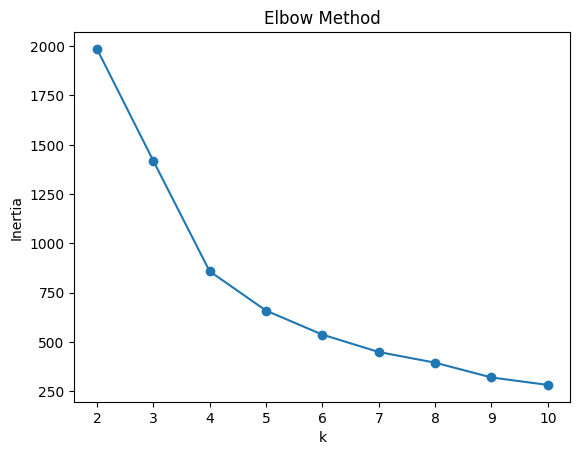

In [16]:
import matplotlib.pyplot as plt
inertia_list = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia_list.append(km.inertia_)

plt.plot(range(2,11), inertia_list, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


Q3) What defines each cluster?

In [17]:
km = KMeans(n_clusters=5, random_state=42).fit(X)
print("Cluster Centers:\n", km.cluster_centers_)


Cluster Centers:
 [[-0.93037496 -0.82781059]
 [ 0.76592863  0.4551027 ]
 [-0.03569973 -0.41166734]
 [24.41328234 -0.87795412]
 [ 0.88621685  1.94088423]]


Q4) How to visualize clusters?

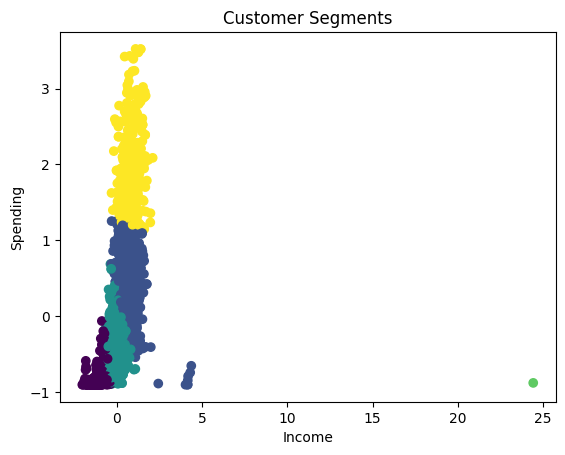

In [18]:
labels = km.labels_

plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Customer Segments")
plt.show()


Q5) What is inertia?

In [19]:
print("Inertia =", km.inertia_)


Inertia = 659.6787943778909


Q6) How to scale features?

In [20]:
# already done above using StandardScaler
print(X[:5])


[[ 0.2340627   0.97822575]
 [-0.23455948 -0.87202383]
 [ 0.76947764  0.35851074]
 [-1.01723878 -0.87202383]
 [ 0.24022146 -0.39167058]]


Q7) What is silhouette score?

In [21]:
from sklearn.metrics import silhouette_score
print("Silhouette Score =", silhouette_score(X, labels))


Silhouette Score = 0.4304021692957908


Q8) How to interpret results?

In [22]:
cluster_df = df.copy()
cluster_df['Cluster'] = labels
print(cluster_df.groupby('Cluster').mean(numeric_only=True))

                  ID   Year_Birth         Income   Kidhome  Teenhome  \
Cluster                                                                
0        5612.868766  1972.994751   28797.119423  0.814961  0.330709   
1        5694.290090  1966.428829   71492.127928  0.104505  0.511712   
2        5527.168111  1966.487002   51263.492201  0.476603  0.793761   
3        9432.000000  1977.000000  666666.000000  1.000000  0.000000   
4        5445.003115  1967.214953   74494.305296  0.074766  0.392523   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        48.968504   25.879265   5.737533        23.251969         8.909449   
1        49.477477  456.843243  49.432432       324.825225        71.841441   
2        48.181976  165.060659  18.249567        84.559792        25.301560   
3        23.000000    9.000000  14.000000        18.000000         8.000000   
4        49.887850  9

Q9) What is the business impact?

In [23]:
print(cluster_df['Cluster'].value_counts())


Cluster
0    762
2    577
1    555
4    321
3      1
Name: count, dtype: int64


Q10) How to use clustering in marketing?

In [24]:
for c in range(5):
    print("Cluster",c,"sample customers:")
    print(cluster_df[cluster_df['Cluster']==c].head(3))
    print("-----")


Cluster 0 sample customers:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
3  6182        1984  Graduation       Together  26646.0        1         0   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
3  10-02-2014       26        11  ...             0             0   
7  08-05-2013       32        76  ...             0             0   
8  06-06-2013       19        14  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
3             0             0             0         0              3   
7             0             0             0         0              3   
8             0             0             0         0              3   

   Z_Revenue  Response  Cluster  
3         11         0        0  
7         11         0   

Q11) How to handle outliers?

In [27]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df['Income'] >= Q1-1.5*IQR) & (df['Income'] <= Q3+1.5*IQR)]
print(df_clean.shape)

(2208, 29)


Q12) Why numeric features only?

In [28]:
print(df.select_dtypes(include=['float64','int64']).columns)


Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


Q13) Why random_state is used?

In [29]:
km1 = KMeans(n_clusters=5, random_state=1).fit(X)
km2 = KMeans(n_clusters=5, random_state=42).fit(X)

print(km1.cluster_centers_)
print(km2.cluster_centers_)


[[ 0.88621685  1.94088423]
 [-0.93037496 -0.82781059]
 [ 0.76592863  0.4551027 ]
 [-0.03569973 -0.41166734]
 [24.41328234 -0.87795412]]
[[-0.93037496 -0.82781059]
 [ 0.76592863  0.4551027 ]
 [-0.03569973 -0.41166734]
 [24.41328234 -0.87795412]
 [ 0.88621685  1.94088423]]


Q14) Why is K-Means unsupervised?

In [30]:
print(df.columns)  # no label column like "Category"


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


Q15) When use DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
print(db.labels_[:20])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
